# Online Retail K-Means & Hierarchical Clustering
Dive into the fascinating world of clustering! In this section, we’ll explore K-means and Hierarchical methods to analyze online retail data.
### Online Retail Dataset Overview
The Online Retail dataset captures all transactions from December 1, 2010, to December 9, 2011, for a UK-based non-store online retailer. This company specializes in unique gifts for all occasions, and a significant portion of its customers are wholesalers.We will be using the online retail trasnational dataset to build a KMean clustering and choose the best set of customers which the company should target. Explore the insights this rich dataset has to offer! Have a touch with the data [here](https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering)

### Focus of the Study

In this analysis, we have selected two key features to gain insights into our customers and their purchasing behavior: **Total Price** and **Total Quantity**. The primary goal is to identify the diverse categories of customers based on these features. 

We are particularly interested in distinguishing between:

- **High Total Price, Low Total Quantity**: These customers typically purchase high-value items but do so infrequently.
- **Low Total Price, High Total Quantity**: These customers tend to buy lower-value items in larger quantities.

However, our aim is not to limit our analysis to just these two groups. Instead, we want to categorize customers into various segments based on the combination of the two features. By doing so, we can better understand the purchasing patterns and preferences of our customer base, leading to more targeted marketing strategies and improved customer relationship management.

I'm excited to share that I've created an interactive dashboard for this model, allowing for deeper exploration and visualization of the clustering results. You can access the interactive section through the following link:

[Interactive Dashboard](https://blank-app-vtax15kqtj.streamlit.app/)

# Prepare data

### Importing Essential Libraries for Clustering

To effectively perform clustering analysis, we import the following libraries:

- **Pandas**: This powerful data manipulation library is essential for data handling, allowing us to easily read, process, and analyze our dataset.

- **Seaborn**: Built on top of Matplotlib, Seaborn provides a high-level interface for drawing attractive statistical graphics, making it easier to visualize data distributions and relationships.

- **Plotly Express**: This library enables the creation of interactive plots, allowing us to explore data visually in a more engaging way, which is particularly useful for presenting clustering results.

- **Matplotlib**: A foundational plotting library in Python, Matplotlib is crucial for creating static, animated, and interactive visualizations, supporting our exploratory data analysis.

- **Scikit-learn**: This versatile library includes various machine learning algorithms, including clustering techniques. Among its offerings, the **K-Means model** stands out as a popular choice for partitioning data into distinct clusters. K-Means works by iteratively assigning data points to clusters based on their proximity to cluster centroids, making it efficient for handling large datasets. The model's simplicity and effectiveness in identifying patterns in data make it an invaluable tool in clustering analysis.

- **Silhouette Score**: This metric helps assess the quality of clustering. By measuring how similar an object is to its own cluster compared to other clusters, it provides insights into the appropriateness of the chosen number of clusters.

Together, these libraries form a powerful toolkit for performing comprehensive clustering analysis, enabling us to extract meaningful insights from our online retail data.

# Import

In [69]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Explore

In [70]:
def wrangle(filepath):
    #reaing the data using filepath
    data = pd.read_csv(filepath, encoding='ISO-8859-1')

    #making the data into a dataframe
    df = pd.DataFrame(data)

    #implimenting a new column 'totalprize'
    df["totalprize"] = df["Quantity"] * df["UnitPrice"]

    #calculating the total money spend by each customer
    df1 = df.groupby("CustomerID")["totalprize"].sum().reset_index()

    #calculating the total quandity purchased by each customer
    df2 = df.groupby("CustomerID")["Quantity"].sum().reset_index()

    #combainning 'df1' and 'df2' in a single dataframe
    df = pd.merge(df1, df2, on='CustomerID', how='outer')

    #rename the column 'Quandity'
    df.rename(columns={"Quantity" : "totalquandity"}, inplace=True)

    df = df[df["totalquandity"] != 0]
    df = df[df["totalprize"] != 0]

    return df

We have initiated our exploratory data analysis by first creating a data wrangling function to prepare the dataset for further analysis. The steps in our wrangling function are as follows:

1. **Read the Dataset**: We load the data using the `read_csv` method to access our online retail transactions.
2. **Create a DataFrame**: The data is organized into a DataFrame for easier manipulation and analysis.
3. **Calculate Total Price**: We create a new column, **Total Price**, by multiplying the **Quantity** and **Unit Price** columns for each observation, providing insight into the overall sales value.
4. **Group by Customer ID**: We generate a new DataFrame that aggregates the total price for each customer by grouping the original DataFrame by **CustomerID**.
5. **Calculate Total Quantity**: Similarly, we create another DataFrame that sums the **Quantity** for each customer by grouping by **CustomerID**.
6. **Combine DataFrames**: We merge these two new DataFrames on the **CustomerID** column, providing a comprehensive view of customer purchases.
7. **Rename Columns**: We rename the **Quantity** column to **Total Quantity** for clarity.
8. **Drop Zero Values**: Finally, we drop any observations where the **Total Price** is equal to zero, ensuring our analysis focuses on meaningful transactions.
9. **Return the Final DataFrame**: We return the cleaned and combined DataFrame, ready for further exploration and analysis.




In [71]:
#data frame import as 'df'
df = wrangle("/Users/user/Downloads/OnlineRetail.csv.zip")
print(f"shape of the dataframe {df.shape}")
df.head()

shape of the dataframe (4357, 3)


,CustomerID,totalprize,totalquandity
1,12347.0,4310.00,2458
2,12348.0,1797.24,2341
3,12349.0,1757.55,631
4,12350.0,334.40,197
5,12352.0,1545.41,470


To load the data into a DataFrame, we utilize our previously defined wrangle function, passing the file path of the dataset as an argument. This function encompasses all the necessary steps to clean and prepare the data for analysis.

In [72]:
#correlation between 'totalprize' and 'totalquandity'
corr = df[["totalprize", "totalquandity"]].corr()
corr

,totalprize,totalquandity
totalprize,1.000000,0.922402
totalquandity,0.922402,1.000000


The correlation matrix shows a strong positive correlation between **Total Price** and **Total Quantity**, with a correlation coefficient of approximately 0.92. This indicates that as the total price increases, the total quantity purchased also tends to increase, suggesting a relationship between the value of items purchased and the quantity bought.

This correlation is important for our K-Means model because it indicates that the two features are likely to provide complementary information when clustering customers. The strong relationship can help the model better differentiate between customer segments, leading to more meaningful and actionable clusters. Understanding this correlation allows us to make informed decisions about feature selection and enhances the overall effectiveness of our clustering analysis.

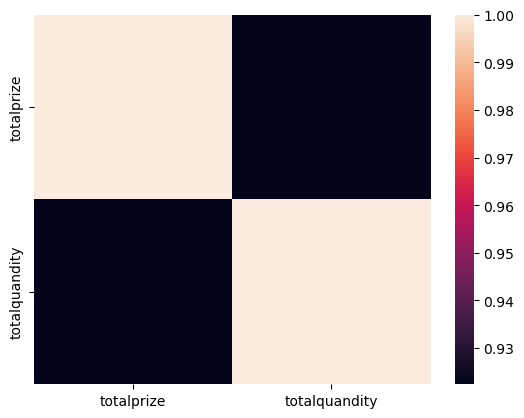

In [73]:
#visualization of the correlation
sns.heatmap(corr);

The correlation heatmap illustrates the relationship between **Total Price** and **Total Quantity**. With a strong positive correlation of approximately 0.92, indicated by a dark color, it shows that customers who spend more tend to purchase more items. This visual representation emphasizes the relevance of both features in our clustering analysis, suggesting they will help segment customers effectively.

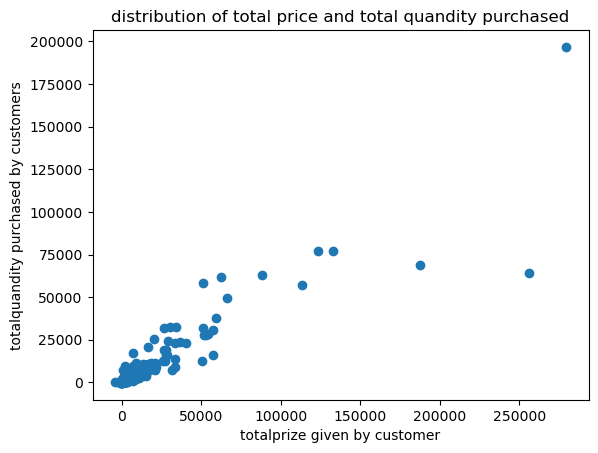

In [74]:
#Scatterplot of 'df' showing the totalprize given by customer as a function of total quandity purchased.
plt.scatter(
    x=df["totalprize"],
    y=df["totalquandity"]
)
plt.xlabel("totalprize given by customer")
plt.ylabel("totalquandity purchased by customers")
plt.title("distribution of total price and total quandity purchased");

This scatter plot visualizes customer observations based on **Total Price** and **Total Quantity**. Each point represents a customer, with their position determined by the values of these two features. The distribution of points allows us to identify clusters and patterns in purchasing behavior, revealing insights into how different customers interact with our products. By examining this plot, we can better understand the relationships between high-value and high-quantity purchases, which will inform our clustering strategy.

However, the scatter plot reveals a limited spread of points, likely masked by **outliers** in the dataset. In customer analysis, **every individual counts**, and outliers can cloud our insights.

To overcome this, we’ll take a strategic approach: splitting our dataset into two groups—**trimmed** (where we remove outliers) and **non-trimmed** (which includes **every customer**). By applying clustering models to both groups, we’ll uncover which method reveals the richest insights into our customers' purchasing behaviors. Let’s dive in and see what we discover!

In [125]:
df.drop(columns="CustomerID").describe()

,totalprize,totalquandity
count,4357.000000,4357.000000
mean,1904.774917,1123.373193
std,8232.771516,4677.187198
min,-4287.630000,-303.000000
25%,296.710000,154.000000
50%,650.430000,368.000000
75%,1617.630000,963.000000
max,279489.020000,196719.000000


here is the description of the no-trimmed data.

In [126]:
#trimmed 10% bottom and top of 'df'.
lower_bound_col1 = df["totalprize"].quantile(0.02)
upper_bound_col1 = df["totalprize"].quantile(0.98)

lower_bound_col2 = df["totalquandity"].quantile(0.02)
upper_bound_col2 = df["totalquandity"].quantile(0.98)

df_trimmed = df[
    (df["totalprize"] >= lower_bound_col1) & (df["totalprize"] <= upper_bound_col1) &
    (df["totalquandity"] >= lower_bound_col2) & (df["totalquandity"] <= upper_bound_col2)
]
df_trimmed.head()

,CustomerID,totalprize,totalquandity
1,12347.0,4310.00,2458
2,12348.0,1797.24,2341
3,12349.0,1757.55,631
4,12350.0,334.40,197
5,12352.0,1545.41,470


We then trimmed the top 2% and bottom 2% of the data to focus on the most relevant observations.

In [127]:
df_trimmed.drop(columns="CustomerID").describe()

,totalprize,totalquandity
count,4138.000000,4138.000000
mean,1236.188684,727.679797
std,1526.704200,909.059920
min,56.250000,16.000000
25%,306.562500,162.000000
50%,651.290000,368.000000
75%,1524.445000,916.500000
max,10464.850000,5942.000000


here is the description of the trimmed data.

In [77]:
print(df.shape)
print(df_trimmed.shape)

(4357, 3)
(4138, 3)


here we can see the shape of **non-trimmed** data and **trimmed** data respectively.

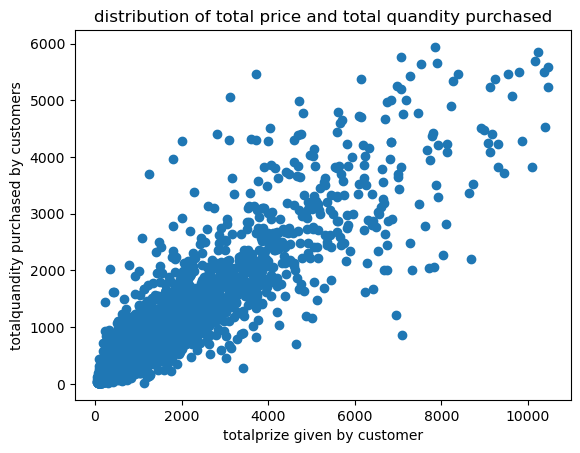

In [79]:
#Scatterplot of 'df_trimmed' showing the totalprize given by customer as a function of total quandity purchased.
plt.scatter(
    x=df_trimmed["totalprize"],
    y=df_trimmed["totalquandity"]
)
plt.xlabel("totalprize given by customer")
plt.ylabel("totalquandity purchased by customers")
plt.title("distribution of total price and total quandity purchased");

This scatter plot visualizes customer observations based on **Total Price** and **Total Quantity** in the **Trimmed** data. Each point represents a customer, with their position determined by the values of these two features.

In [128]:
#correlation of items in df_trimmed
corr_trim = df_trimmed[["totalprize" , "totalquandity"]].corr()
corr_trim

,totalprize,totalquandity
totalprize,1.000000,0.910535
totalquandity,0.910535,1.000000


Here we can see the correlation for 2 feature column in our **Trimmed** data.The correlation matrix indicates a strong positive correlation between **Total Price** and **Total Quantity**, with a correlation coefficient of approximately **0.91**. This value suggests that as customers' total spending (Total Price) increases, the quantity of items they purchase (Total Quantity) also tends to rise.

This strong relationship is important for our analysis, as it implies that customers who buy higher-value items are likely to buy them in larger quantities. Understanding this correlation helps us identify customer segments and tailor marketing strategies effectively. It also reinforces the relevance of both features in our clustering model, enabling us to group customers based on their purchasing behaviors more accurately.

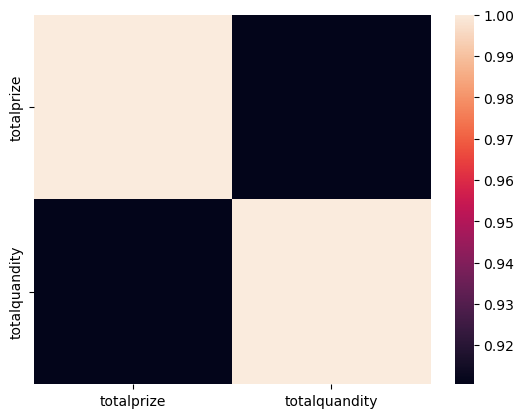

In [81]:
sns.heatmap(corr_trim);

The correlation heatmap illustrates the relationship between **Total Price** and **Total Quantity**. With a strong positive correlation of approximately 0.92, indicated by a dark color, it shows that customers who spend more tend to purchase more items. This visual representation emphasizes the relevance of both features in our clustering analysis, suggesting they will help segment customers effectively.

# Split
Here we are not going to split the data info target vector and feature matric.Unlike supervised learning algorithms, clustering models operate in an unsupervised manner, meaning they do not rely on labeled target variables. In clustering, the goal is to identify inherent groupings within the data based solely on the features available.

This approach allows clustering algorithms, such as K-Means, to discover patterns and relationships without predefined labels. By analyzing the similarities and differences among observations, these models can effectively segment data into meaningful clusters based on the inherent structure of the data itself. 
The absence of a target variable enables clustering to reveal insights that may not be apparent through traditional supervised methods, allowing for a more exploratory and holistic understanding of the dataset.

In [82]:
#feature for both 'df' and 'df_trimmed'.
X0 = df[["totalprize" , "totalquandity"]]
X1 = df_trimmed[["totalprize" , "totalquandity"]]

In our analysis, we have assigned the features from the non-trimmed dataset to **X0** and the features from the trimmed dataset to **X1**. This distinction allows us to apply clustering models to both datasets and compare the results effectively.

### Here we are using our K-Means model: our powerful tool!

Let’s dive into K-Means, our go-to for grouping customers! K-Means works by dividing our data into K clusters based on similarity.

1. **Choose K**: First, we decide how many clusters we want to create—like picking teams for a game!
2. **Random Centroids**: It randomly places K centroids (the leaders of each cluster) in the feature space.
3. **Assign Customers**: Each customer joins the nearest centroid’s team based on their purchasing behavior.
4. **Update Centroids**: The centroids then move to the average position of their team members.
5. **Repeat**: This process continues until the centroids stabilize, revealing meaningful customer segments.

K-Means is efficient and great for uncovering insights, helping us better understand our customers and tailor our strategies. Let’s see what this superhero can reveal!

In [83]:
#buildiong the kmean models for both of the data.
model0 = KMeans(n_clusters=3, random_state=42)
model0.fit(X0)


KMeans(n_clusters=3, random_state=42)

In [84]:
model1 = KMeans(n_clusters=3, random_state=42)
model1.fit(X1)

KMeans(n_clusters=3, random_state=42)

We have deployed two K-Means models, training one using the non-trimmed dataset (**X0**) and the other with the trimmed dataset (**X1**). This approach allows us to compare the performance of both models and assess how outlier removal impacts our clustering results.

In [85]:
# labels of models
labels0 = model0.labels_
print(labels0)

[0 0 0 ... 0 0 0]


In [86]:
labels1 = model1.labels_
print(labels1)

[1 1 0 ... 0 1 1]


We have built our K-Means model using 3 clusters (K=3). After fitting the models, we retrieved the labels assigned to our observations. The labels from the non-trimmed model are stored in label0, while the labels from the trimmed model are stored in label1.

In [87]:
#definning the 'centroids'
centroids0 = model0.cluster_centers_
centroids1 = model1.cluster_centers_
print(f"centroids for model0 is: {centroids0}")
print(f"centroids for model1 is: {centroids1}")

centroids for model0 is: [[  1386.51947108    824.89148542]
 [182181.98166667  90219.5       ]
 [ 41843.97482759  27173.75862069]]
centroids for model1 is: [[ 565.8036567   335.7982819 ]
 [2596.06839975 1558.99873897]
 [6328.44376238 3561.57920792]]


Next, we assigned the centroids for each label in both models. The centroids from the non-trimmed model are stored in **centroids0**, while the centroids from the trimmed model are stored in **centroids1**.

With the labels and their corresponding centroids in hand, we are now ready to visualize our results. We will create two scatter plots to display the observations and their centroids for both datasets. This will help us see how well the clusters are formed and how the centroids represent each group.

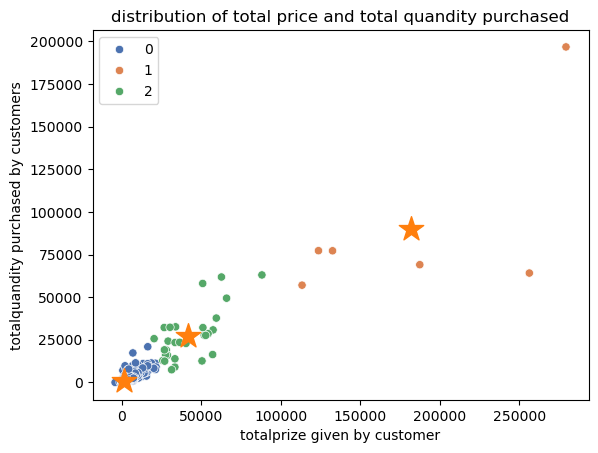

In [88]:
#scatterplot of the features with labels assingned by the models.
sns.scatterplot(
    x=df["totalprize"],
    y=df["totalquandity"],
    hue=labels0,
    palette="deep"
)
plt.xlabel("totalprize given by customer")
plt.ylabel("totalquandity purchased by customers")
plt.title("distribution of total price and total quandity purchased");

#Also including the centrids in this plot.
plt.scatter(
    x=centroids0[:, 0],
    y=centroids0[:, 1],
    marker="*",
    s=340
);

This is for first model

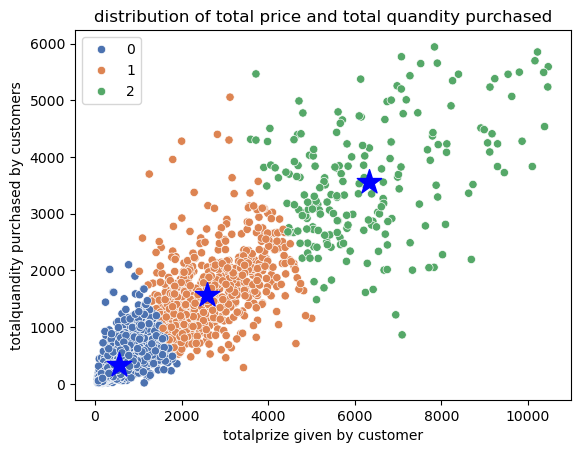

In [89]:
sns.scatterplot(
    x=df_trimmed["totalprize"],
    y=df_trimmed["totalquandity"],
    hue=labels1,
    palette="deep"
)
plt.xlabel("totalprize given by customer")
plt.ylabel("totalquandity purchased by customers")
plt.title("distribution of total price and total quandity purchased");

#Also including the centrids in this plot.
plt.scatter(
    x=centroids1[:, 0],
    y=centroids1[:, 1],
    color = "blue",
    marker="*",
    s=340
);

And this is for the second one.

After plotting our clusters, we will calculate two important metrics: **inertia** and the **silhouette score**.

- **Inertia**: This metric measures how tightly the clusters are packed. Specifically, it quantifies the sum of squared distances between each data point and its assigned centroid. A lower inertia indicates that the clusters are more compact and better defined, while a higher inertia suggests that the clusters may be spread out.

- **Silhouette Score**: This score provides insight into the quality of our clusters by evaluating how similar an observation is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score closer to 1 indicates that the data point is well-clustered, a score near 0 suggests overlapping clusters, and a negative score means the observation may have been assigned to the wrong cluster.

Together, these metrics will help us assess the effectiveness of our K-Means models and guide any necessary adjustments.

In [90]:
#inertia of our 2 model.
inertia0 = model0.inertia_ 
print(f"inertia for model0 is: {inertia0}.")
inertia1 = model1.inertia_ 
print(f"inertia for model1 is: {inertia1}.")

inertia for model0 is: 80422522264.80228.
inertia for model1 is: 2291312751.1670785.


In [91]:
#silhouette score of our 2 model.
ss0 = silhouette_score(X0, model0.labels_)
print(f"silhouette score for model0 is: {ss0}.")

ss1 = silhouette_score(X1, model1.labels_)
print(f"silhouette score for model1 is: {ss1}.")

silhouette score for model0 is: 0.9515210784313328.
silhouette score for model1 is: 0.6689529684101937.


Here we calculated the inertia and silhouette_score.

In our analysis, we initially set the number of clusters to **3**. However, determining the optimal number of clusters is crucial for achieving meaningful results with K-Means.

1. **Understanding Data Structure**: The ideal number of clusters (K) should reflect the natural groupings within the data. Using a fixed value without tuning can lead to underfitting (too few clusters) or overfitting (too many clusters), obscuring the true structure of the data.

2. **Cluster Quality**: Different values of K can significantly impact the quality of the clusters. By tuning K, we can evaluate how well our model captures the underlying patterns, ensuring that each cluster is distinct and meaningful.

3. **Evaluation Metrics**: Techniques like the Elbow Method, Silhouette Score, and Gap Statistic help us systematically evaluate different K values. By analyzing these metrics, we can identify the K that yields the best balance between compactness and separation of clusters.

Ultimately, tuning the number of clusters allows us to optimize our K-Means model, enhancing its ability to uncover valuable insights about customer behaviors and preferences.

In [92]:
#Calculating the suitable number of clusters (k) for 'df'.
n_clusters = range(2, 15)
inertia_errors0 = []
sil_score0 = []
for c in n_clusters:
    model = KMeans(n_clusters=c, random_state=42)
    model.fit(X0)
    inertia_errors0.append(model.inertia_)
    sil_score0.append(silhouette_score(X0, model.labels_))
print(f"inertia for models: {inertia_errors0}.")
print(f"silhouette score for models {sil_score0}.")

inertia for models: [144465323911.20856, 80422522264.80228, 55449558413.4565, 41254590680.22725, 25002076030.16446, 19823951960.755104, 15703050717.897324, 11162434714.198496, 9720015087.375946, 8598239625.58728, 6271458321.199189, 5535475410.451281, 4855049364.038741].
silhouette score for models [0.9845705386740918, 0.9515210784313328, 0.9515415164440906, 0.9334893140605842, 0.8049711415706705, 0.7168104572134032, 0.7800475150358808, 0.7141752527588741, 0.6843266786608241, 0.6576001457709011, 0.6580862880727556, 0.5727965079027811, 0.5608039000730916].


We have conducted our initial K tuning using a for loop on the non-trimmed data. By training multiple K-Means models with different values of K, we obtained varying silhouette scores and inertia for each model. This approach allows us to assess how different cluster configurations impact model performance, helping us identify the most suitable K value for our analysis.

In [93]:
#Calculating the suitable number of clusters (k) for 'df_trimmed'.
n_clusters = range(2, 15)
inertia_errors1 = []
sil_score1 = []
for c in n_clusters:
    model = KMeans(n_clusters=c, random_state=42)
    model.fit(X1)
    inertia_errors1.append(model.inertia_)
    sil_score1.append(silhouette_score(X1, model.labels_))
print(f"inertia for models: {inertia_errors1}.")
print(f"silhouette score for models {sil_score1}.")

inertia for models: [4438930775.009483, 2291312751.1670785, 1536455636.3678908, 1158795050.131544, 925856700.4909192, 798788358.2929152, 743896960.3194352, 650669580.442836, 581771335.0350505, 530339496.9764004, 485212785.44757515, 448688447.76594687, 435945148.3703215].
silhouette score for models [0.7381120281412135, 0.6689529684101937, 0.6108033154106459, 0.5775399470466224, 0.537035935393886, 0.49494778263264827, 0.515338092337819, 0.490965244463369, 0.46828634961260834, 0.47140021272345756, 0.4710055248394082, 0.45198175918487193, 0.45572173487379386].


Similarly, we have performed K tuning for the trimmed data, following the same approach as with the non-trimmed dataset. By training multiple K-Means models with different K values, we obtained varying silhouette scores and inertia metrics for each model. This process allows us to evaluate the effectiveness of our clustering in both datasets and helps us determine the optimal K for our analysis.

After conducting our K tuning, we created a graph to illustrate the relationship between the number of clusters (n_clusters) and inertia. This graph serves as a visual representation of how inertia changes as we adjust K.


1. **Interpreting the Graph**: On the graph, you will likely observe a downward trend, where inertia decreases with increasing K. However, the rate of decrease may slow down after a certain point, leading to a shape resembling an "elbow."

2. **Identifying the Elbow Point**: The "elbow" in the graph is crucial for selecting the optimal K. It represents a balance point where increasing the number of clusters yields diminishing returns in inertia reduction. Choosing K at this point helps ensure our model is both effective and efficient, avoiding unnecessary complexity.

By analyzing this graph, we gain valuable insights into the relationship between K and cluster compactness, guiding our selection of the most appropriate number of clusters for our analysis.

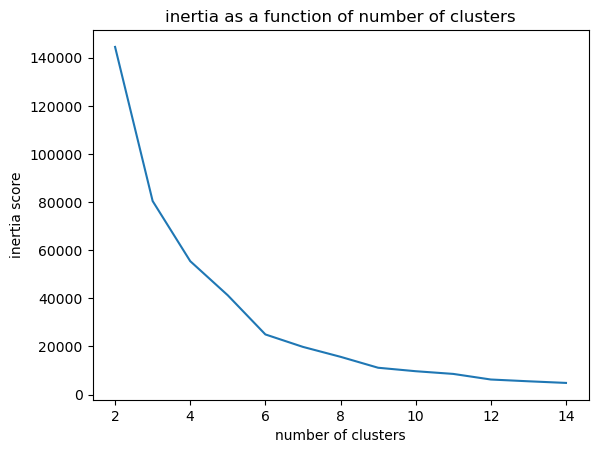

In [129]:
#inertia errors as a function of number of clusters (k) for 'df'
plt.plot(n_clusters, [c / 1e6 for c in inertia_errors0] )
plt.xlabel("number of clusters")
plt.ylabel("inertia score")
plt.title("inertia as a function of number of clusters");

Graph for non-trimmed data

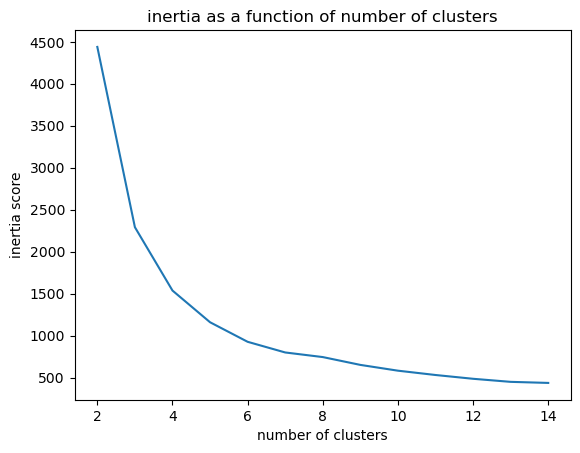

In [95]:
#inertia errors as a function of number of clusters (k) for 'df_trimmed'.
plt.plot(n_clusters, [c / 1e6 for c in inertia_errors1] )
plt.xlabel("number of clusters")
plt.ylabel("inertia score")
plt.title("inertia as a function of number of clusters");

Graph for Trimmed data.

Next, we will create a graph that displays the relationship between the silhouette score and the number of clusters (n_clusters). This graph is crucial for evaluating the effectiveness of our clustering configurations.

2. **Graph Interpretation**: On the graph, you will observe how the silhouette score changes as we increase the number of clusters. Typically, we expect the silhouette score to rise with increasing K, as more clusters can lead to better separation of the data.

3. **Identifying Optimal K**: The peak of the silhouette score on the graph indicates the optimal number of clusters. Choosing K at this peak ensures that our clusters are both well-defined and meaningful, striking a balance between complexity and interpretability.

4. **Insights for Model Selection**: This visualization allows us to easily compare different K values and their corresponding silhouette scores, helping us make informed decisions about the most suitable K for our analysis.

By analyzing this graph, we gain valuable insights into how well our clusters are formed, guiding us toward a robust clustering solution that enhances our understanding of customer behavior.

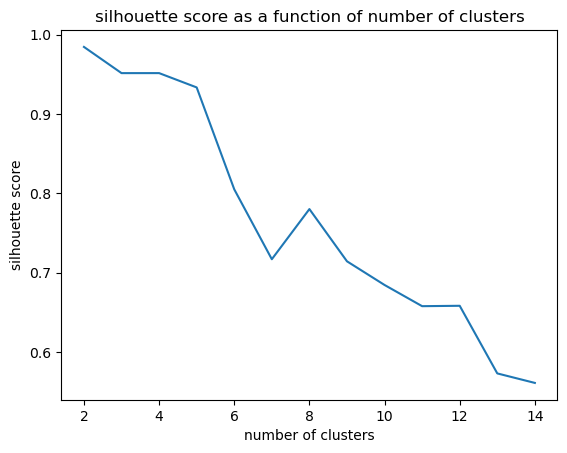

In [96]:
#silhouette score as a function of number of clusters (k) for 'df'
plt.plot(n_clusters, sil_score0)
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.title("silhouette score as a function of number of clusters");

Graph for non-trimmed data.

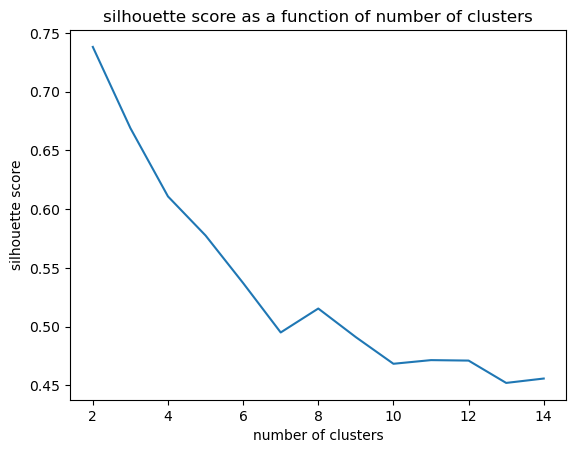

In [97]:
#silhouette score as a function of number of clusters (k) for 'df_trimmed'
plt.plot(n_clusters, sil_score1)
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.title("silhouette score as a function of number of clusters");

Graph for trimmed data. After analyzing the graphs illustrating the relationships between number of clusters vs. inertia and silhouette score vs. number of clusters, we can make informed decisions about the optimal number of clusters for our K-Means model.

1. **Evaluating the Elbow Graph**: 
   - In the inertia vs. n_clusters graph, we look for the "elbow" point where the rate of decrease in inertia slows down significantly. This point suggests that adding more clusters beyond this threshold yields diminishing returns in terms of compactness. It indicates a balanced trade-off between complexity and performance.
  
2. **Assessing the Silhouette Score Graph**:
   - The silhouette score vs. n_clusters graph shows how the quality of clustering changes with different K values. We seek the peak silhouette score, as this indicates the highest degree of separation and cohesion among clusters. The ideal K is typically the point where the silhouette score is maximized.

3. **Cross-Referencing Both Graphs**:
   - By comparing insights from both graphs, we can reinforce our choice for K. For instance, if the optimal K from the silhouette score aligns closely with the elbow point from the inertia graph, this strengthens our confidence in that K value.
   - Conversely, if the silhouette score continues to rise significantly even after the elbow point, it may suggest that further tuning is necessary to capture more nuanced patterns in the data.

4. **Final Decision**:
   - Ultimately, we select the K value that balances a low inertia (indicating compact clusters) with a high silhouette score (indicating well-separated clusters). This balanced approach ensures that we choose a model that not only fits the data well but also provides meaningful insights into customer behavior.

By synthesizing the information from both graphs, we can confidently determine the most suitable number of clusters for our analysis, optimizing our K-Means model for better performance.

#### By combining insights from both graphs, we ultimately decided to set our number of clusters to **5** for both data. This choice reflects a balanced consideration of compactness and separation, ensuring that our K-Means model effectively captures the underlying patterns in our data.

Here we are making our new models for both the data with the k value of 5. And these new models are named **final_model0** for **non-trimmed** and **final_model1** for **trimmed** respectivly.

In [130]:
final_model0 = KMeans(
    n_clusters=5,
    random_state=42
)
final_model0.fit(X0)
in_final0 = final_model0.inertia_
ss_final0 = silhouette_score(X0, final_model0.labels_)
print(in_final0)
print(ss_final0)

41254590680.22725
0.9334893140605842


Finalmodel0 for **non-trimmed** data.

In [131]:
final_model1 = KMeans(
    n_clusters=5,
    random_state=42
)
final_model1.fit(X1)
in_final1 = final_model1.inertia_
ss_final1 = silhouette_score(X1, final_model1.labels_)
print(in_final1)
print(ss_final1)

1158795050.131544
0.5775399470466224


Final_model1 for **trimmed** data.

# Communicating the result
Next, we will calculate the mean values for **Total Price** and **Total Quantity** for each cluster in both models. By creating a plot to visualize these mean values, we can uncover valuable insights into the purchasing behavior of different customer segments. This analysis will help us understand how each cluster differs in terms of overall spending and quantity purchased, guiding our business strategies and decision-making.

In [132]:
#mean of totalprice and totalquandity for each classes.
xgb0 = X0.groupby(final_model0.labels_).mean()
xgb0

,totalprize,totalquandity
0,1327.180505,791.904574
1,221960.330000,66575.500000
2,30557.824750,17756.525000
3,279489.020000,196719.000000
4,91030.744286,63381.857143


**xgb0** for **final_model0** 

In [133]:
xgb1 = X1.groupby(final_model1.labels_).mean()
xgb1

,totalprize,totalquandity
0,405.738352,236.632435
1,2878.205515,1705.211845
2,5032.209192,3010.606061
3,1420.780941,859.921225
4,8208.818923,4364.553846


**xgb1** for **final_model1**

In our analysis of **final_model0**, we calculated the mean values for **Total Price** and **Total Quantity** for each cluster. The results are as follows

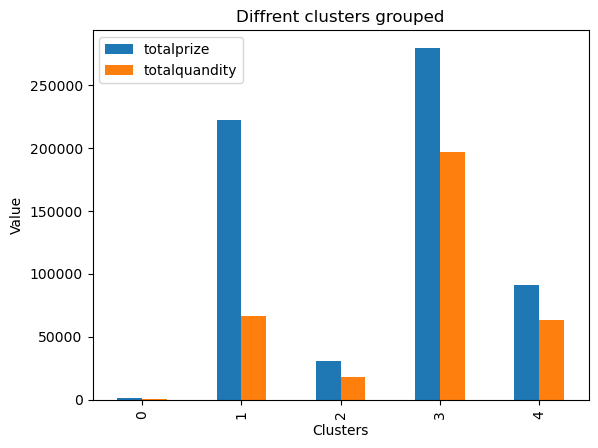

In [134]:
xgb0.plot(kind="bar")
plt.xlabel("Clusters")
plt.ylabel("Value")
plt.title("Diffrent clusters grouped");

1. **Cluster 0**: This cluster has a relatively low mean total price and quantity. It likely represents customers who make smaller, less frequent purchases.

2. **Cluster 1**: This cluster stands out with the highest mean total price and quantity. These customers are significant contributors to revenue, indicating they purchase high-value items in large quantities. They represent a segment of high-value customers.

3. **Cluster 2**: Customers in this cluster have moderate mean values for both total price and quantity. This suggests a balanced purchasing behavior, potentially indicating regular buyers of mid-range products.

4. **Cluster 3**: Similar to Cluster 1, this cluster shows a very high mean total price and quantity. These customers also appear to engage in substantial purchasing, likely reflecting another group of high-value customers.

5. **Cluster 4**: This cluster has a substantial mean total price and quantity but is lower than Clusters 1 and 3. It may represent customers who make significant purchases but less frequently than the highest-value segments.

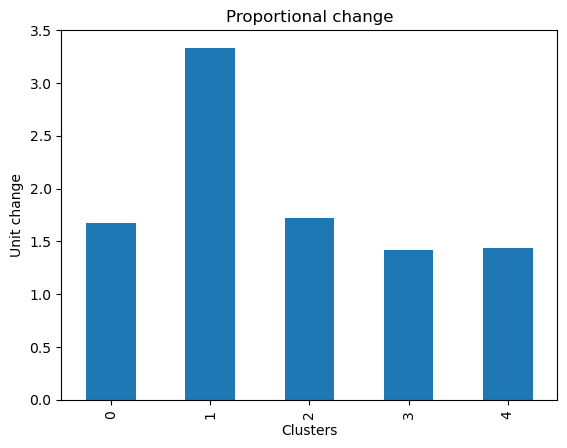

In [156]:
(xgb0["totalprize"] / xgb0["totalquandity"]).plot(kind="bar")
plt.xlabel("Clusters")
plt.ylabel("Unit change")
plt.title("Proportional change");

By looking on the proportionate change graph menshoned above, In Cluster 1, we observe a significant proportionate change in both **Total Price** and **Total Quantity**, indicating that these customers are primarily purchasing high-value products rather than smaller items. This suggests that they are likely high-value customers who contribute substantially to revenue.

In contrast, the remaining clusters exhibit relatively consistent proportionate changes for both metrics. This indicates that these clusters may represent customers with more varied purchasing behavior, possibly buying a mix of both high-value and lower-value items. 

Overall, your analysis highlights the distinct characteristics of Cluster 1 compared to the other clusters, emphasizing the need for targeted marketing strategies to engage high-value customers effectively.

Now, let's shift our focus to the next model, **final_model1**, which has been trained using the trimmed data. This model will help us analyze customer segments without the influence of outliers, providing additional insights into purchasing behavior.

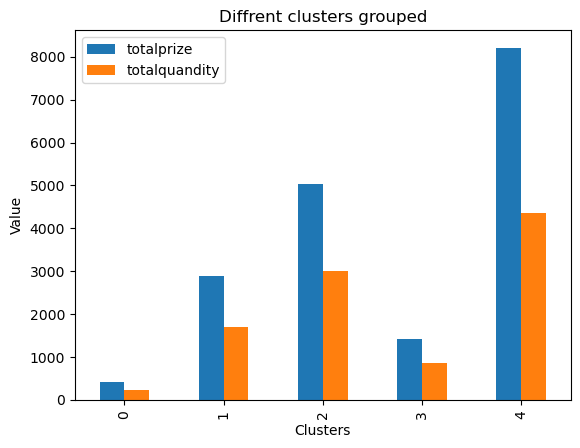

In [136]:
xgb1.plot(kind="bar")
plt.xlabel("Clusters")
plt.ylabel("Value")
plt.title("Diffrent clusters grouped");

1. **Cluster 0**: This cluster has the lowest mean total price and quantity. These customers are likely making smaller purchases, indicating a segment that may need targeted strategies to increase their spending.

2. **Cluster 1**: Customers in this cluster show moderate mean values for both total price and quantity. They likely represent buyers who purchase a mix of mid-range and some high-value items, indicating potential for increased engagement.

3. **Cluster 2**: This cluster shows significantly higher mean values for both total price and quantity. These customers are likely to be more engaged and purchasing higher-value items in substantial quantities, marking them as valuable segments.

4. **Cluster 3**: Similar to Cluster 1, this cluster has a lower mean total price compared to Clusters 2 and 4, but still shows a healthy average quantity. This suggests they may be frequent purchasers of lower to mid-range products.

5. **Cluster 4**: Standing out with the highest mean total price and quantity, this cluster indicates customers who are buying high-value items in large quantities. They represent the most lucrative segment and should be prioritized in marketing efforts.

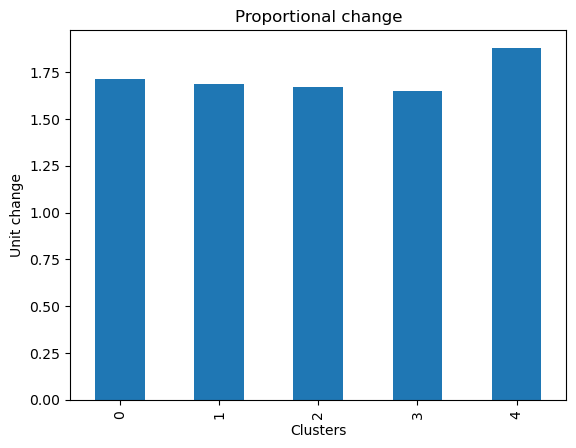

In [124]:
(xgb1["totalprize"] / xgb1["totalquandity"]).plot(kind="bar")
plt.xlabel("Clusters")
plt.ylabel("Unit change")
plt.title("Proportional change");

In contrast to our analysis of **final_model0**, the proportional change in **Total Price** and **Total Quantity** across the clusters in **final_model1** reveals a more uniform distribution. 

1. **Consistent Proportions**: 
   - Unlike the significant differences seen in Cluster 1 of the non-trimmed data, here we observe that all clusters exhibit relatively similar levels of proportionate change. This indicates that customer purchasing behaviors are more balanced across different segments.

2. **Implications**:
   - The lack of extreme variation suggests that the trimming process has mitigated the influence of outliers, resulting in clusters that represent a more consistent purchasing behavior. This could imply that customers in this dataset are engaging with a more homogeneous range of products.

3. **Strategic Insights**:
   - With less disparity in purchasing patterns, marketing strategies may need to focus on broadening the appeal to all customer segments rather than targeting a few high-value groups. This might involve introducing more varied product offerings or promotional strategies aimed at boosting engagement across all clusters.

# Conclusion

##### Trimming the data has its advantages and disadvantages. On the positive side, it reduces the influence of outliers, minimizing their skewing effect on the analysis and leading to more accurate insights into typical customer behaviors. This results in balanced clustering that represents more consistent purchasing patterns, making it easier to interpret and tailor marketing strategies. Additionally, trimming can highlight broader trends in customer purchasing behavior.

##### However, there are notable downsides as well. Trimming may eliminate high-value customers who make significant purchases but are considered outliers, which leads to a less nuanced understanding of customer segments. As a result, the model might fail to identify distinct groups of high-value purchasers, missing opportunities for tailored engagement strategies. Furthermore, the resulting clusters may become homogeneous, potentially overlooking key insights related to high-value products.

##### In conclusion, while trimming can enhance analysis by reducing outlier influence and producing clearer patterns, it’s essential to balance these benefits against the risk of losing valuable customer insights. Careful consideration should be given to the implications of trimming on overall customer segmentation and marketing strategies.

#### I believe that in this analysis, it's crucial to consider the non-trimmed data to effectively create distinct customer groups and secure valuable insights. The non-trimmed dataset retains the diversity of purchasing behaviors, including high-value customers who may otherwise be overlooked in a trimmed analysis. By leveraging the non-trimmed data, we can identify and target various segments, leading to more informed marketing strategies and a deeper understanding of customer dynamics. This comprehensive approach ensures that we capture the full spectrum of customer behavior, allowing us to maximize engagement and revenue potential.